In [1]:
from keras import models
from keras.models import load_model
# 这里为模型的地址
best_model = load_model(r'F:\SolarRadioBurst\测试通道归一化\3\二分类\实验1.1_best.h5')
best_model.summary()

out_put = layer_outputs = [layer.output for layer in best_model.layers[3:4]]
activation_model = models.Model(inputs=best_model.input, outputs=layer_outputs)


ERROR! Session/line number was not unique in database. History logging moved to new session 1370
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 398, 98, 32)       896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 199, 49, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 197, 47, 64)       18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 98, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 10, 128)       0         
_______________________

In [2]:
# import numpy as np
# from keras.preprocessing.image import ImageDataGenerator
# train_dir = r'G:\useful_C\test_C\normal3\test\train'
# validation_dir = r'G:\useful_C\test_C\normal3\test\val'
# datagen = ImageDataGenerator(rescale=1./255)
# batch_size = 10
# def extract_features(directory, sample_count):
#     features = np.zeros(shape=(sample_count, 48, 10, 128))
#     labels = np.zeros(shape=sample_count)
#     generator = datagen.flow_from_directory(
#     directory,
#     target_size=(400, 100),
#     batch_size=batch_size,
#     class_mode='binary')
#     i = 0
#     for inputs_batch, labels_batch in generator:
#         features_batch = activation_model.predict(inputs_batch)
#         features[i * batch_size : (i + 1) * batch_size] = features_batch
#         labels[i * batch_size : (i + 1) * batch_size] = labels_batch
#         i += 1
#         if i * batch_size >= sample_count:
#             break
#     return features, labels
#
# # 这里下面要填训练集的验证集图片的总数
# train_features, train_labels = extract_features(train_dir, 600)
# validation_features, validation_labels = extract_features(validation_dir, 180)
#
# train_features = np.reshape(train_features, (600, 48*10*128))
# validation_features = np.reshape(validation_features, (180, 48*10*128))

Found 600 images belonging to 2 classes.
Found 180 images belonging to 2 classes.


In [2]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
train_dir = r'G:\useful_C\test_C\normal3\test\train'
validation_dir = r'G:\useful_C\test_C\normal3\test\val'
test_dir = r'G:\useful_C\test_C\normal3\test\test'
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 10
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 98, 23, 64))
    labels = np.zeros(shape=sample_count)
    generator = datagen.flow_from_directory(
    directory,
    target_size=(400, 100),
    batch_size=batch_size,
    class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = activation_model.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

# 这里下面要填训练集的验证集图片的总数
train_features, train_labels = extract_features(train_dir, 559)
validation_features, validation_labels = extract_features(validation_dir, 176)
test_features, test_labels = extract_features(test_dir, 176)

Found 559 images belonging to 2 classes.
Found 176 images belonging to 2 classes.
Found 176 images belonging to 2 classes.


In [3]:
from keras import models
from keras import layers
from keras import optimizers

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='实验1.1_best.h5',monitor='val_acc',mode='auto' ,save_best_only='True')


model = models.Sequential()
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(98,23,64)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=10,
                    validation_data=(validation_features, validation_labels),
                    callbacks = [checkpoint]
                    )


Train on 559 samples, validate on 176 samples
Epoch 1/30
559/559 [==============================] - 5s 9ms/step - loss: 0.5432 - acc: 0.7943 - val_loss: 0.2405 - val_acc: 0.9034

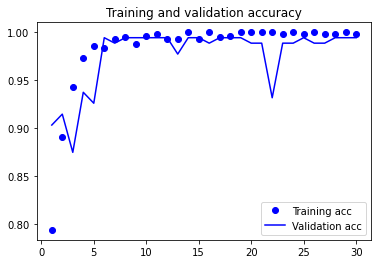

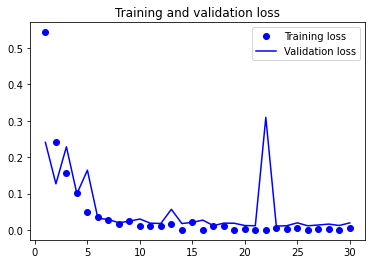

In [4]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

dropout 加在了处理后的一行中，并不是直接和卷积核展宽之后相连


In [3]:
from keras.models import load_model

test_model = load_model(r'实验1.1_best.h5')
loss,acc = test_model.evaluate(test_features, test_labels)

print(loss, acc)

176/176 [==============================] - 2s 13ms/step
0.06533987904814156 0.9772727489471436


In [ ]:
a = [259, 86, 86]
b = [100, 30, 30]